<a href="https://colab.research.google.com/github/Rahul-Ramola/Group-Project/blob/main/Brain%20Tumor/BrainTumor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


STEP 1: IMPORTING ALL THE NECESARY LIBRARIES:

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping

STEP 2: SETTING UP THE DATASET PATHS AND DIRECTORIES:

In [ ]:
# Set the path to the dataset
BASE_DIR = "/content/drive/MyDrive/MedicalAI"
BRAIN_DIR = os.path.join(BASE_DIR, "image_data", "brain_tumor")
MODEL_DIR = os.path.join(BASE_DIR, "models")

In [ ]:
# Define the training and testing directories
train_dir = os.path.join(BRAIN_DIR, "Training")
test_dir= os.path.join(BRAIN_DIR, "Testing")

# Define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]

STEP 3: LOADING AND PREPROCESSING THE DATASET:

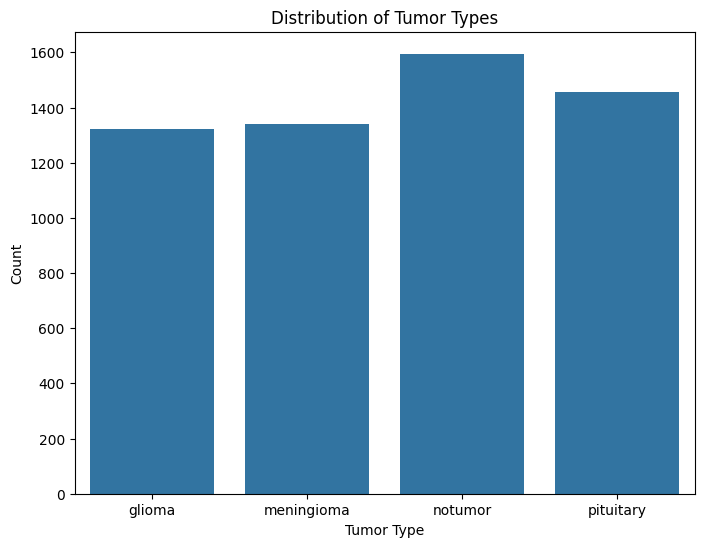

In [ ]:
# Load and preprocess the dataset
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

# Visualize the distribution of tumor types in the training dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()

STEP 4: VISUALIZING IMAGES FOR EACH TUMOR TYPES:

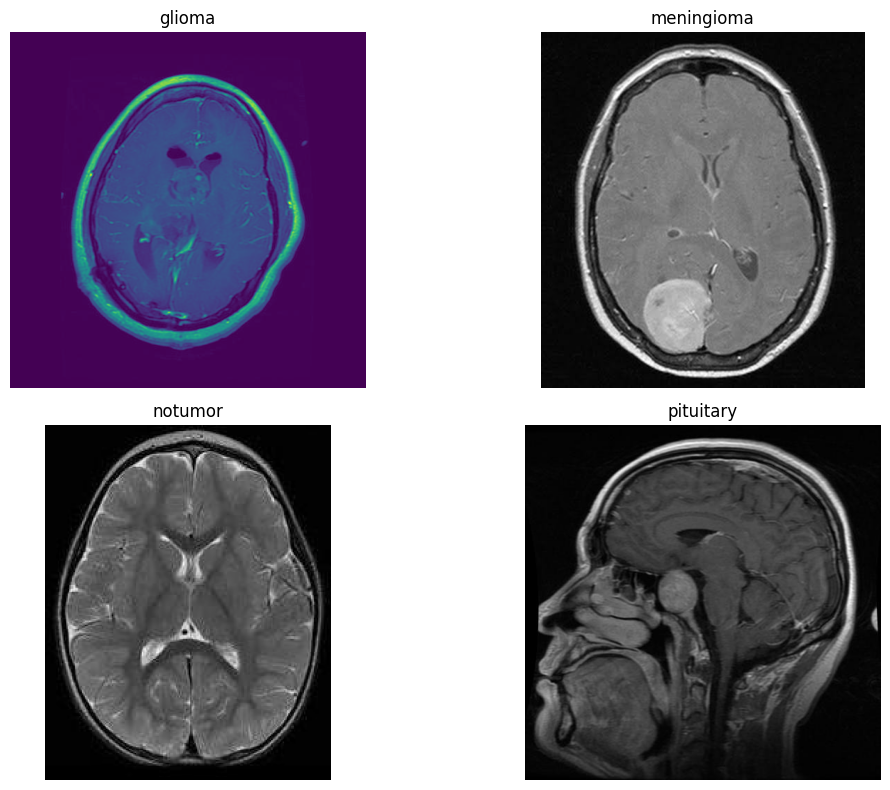

In [ ]:
# Visualize sample images for each tumor type
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

STEP 5: SETTING UP THE IMAGE_SIZE, BATCH_SIZE AND EPOCHS FOR THE MODEL:

In [ ]:
# Set the image size
image_size = (224, 224)

# Set the batch size for training
batch_size = 32

# Set the number of epochs for training
epochs = 50

STEP 6: DATA AUGMENTATION AND PREPROCESSING:

In [ ]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

print(train_generator.class_indices)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


STEP 7: BUILDING THE MODEL ARTITECHURE

In [ ]:
# Define the model architecture
from tensorflow.keras.layers import GlobalAveragePooling2D

model = Sequential([
    Input(shape=(image_size[0], image_size[1], 3)),

    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 274,884 (1.05 MB)

 Trainable params: 274,884 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
import math

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1938s 11s/step - accuracy: 0.3707 - loss: 1.2355 - val_accuracy: 0.4050 - val_loss: 1.5438
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 95s 531ms/step - accuracy: 0.6295 - loss: 0.8959 - val_accuracy: 0.5873 - val_loss: 1.0469
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 96s 538ms/step - accuracy: 0.6885 - loss: 0.8018 - val_accuracy: 0.6240 - val_loss: 0.8884
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 547ms/step - accuracy: 0.7037 - loss: 0.7526 - val_accuracy: 0.5545 - val_loss: 1.1312
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 94s 524ms/step - accuracy: 0.7325 - loss: 0.6921 - val_accuracy: 0.6506 - val_loss: 0.9174
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 93s 520ms/step - accuracy: 0.7112 - loss: 0.7180 - val_accuracy: 0.6926 - val_loss: 0.7656
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 94s 525ms/step - accuracy: 0.7602 - loss: 0.6127 - val_accuracy: 0.6346 - val_loss: 0.8569
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 94s 526ms/step - accuracy: 0.7739 - loss: 0

In [ ]:
model.save(MODEL_DIR + "/brain_tumor_cnn.keras")

STEP 8: VISUALIZATION THROUGH GRAPH

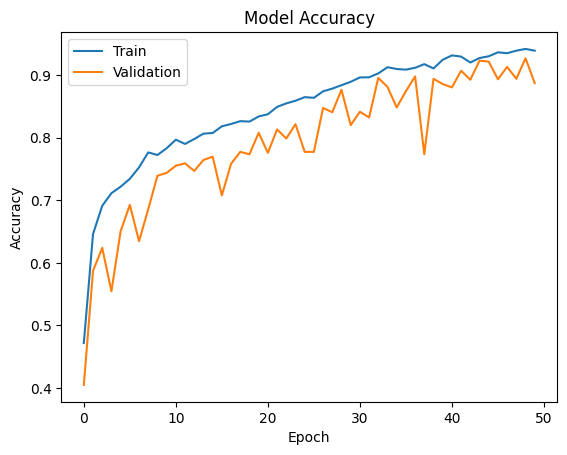

In [ ]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

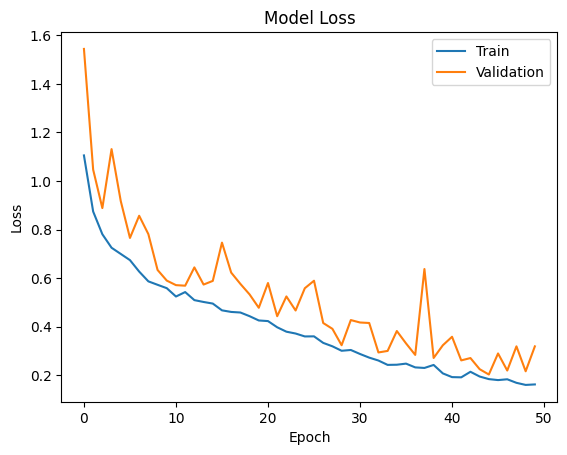

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

STEP 9: EVALUATION

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.8446 - loss: 0.4269
Test Loss: 0.3265589475631714
Test Accuracy: 0.8843749761581421


STEP 10: CONFUSION MATRIX AND EXPLANATION:

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step


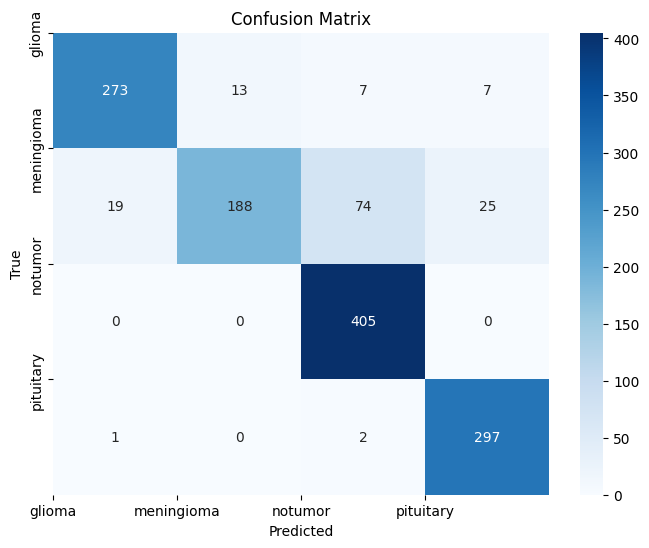

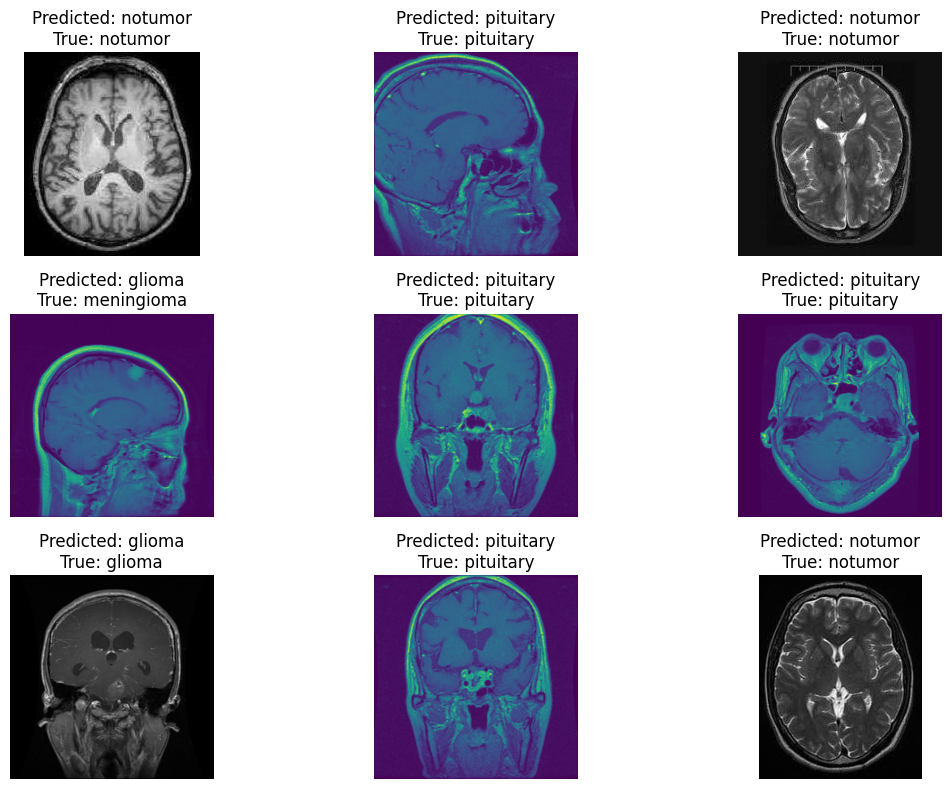

In [ ]:
# Make predictions on the test dataset
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

# Create a confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

# Plot sample images with their predicted and true labels
test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

Class: glioma
Precision: 0.931740614334471
Recall: 0.91
F1-Score: 0.9207419898819562

Class: meningioma
Precision: 0.9353233830845771
Recall: 0.6143790849673203
F1-Score: 0.7416173570019724

Class: notumor
Precision: 0.8299180327868853
Recall: 1.0
F1-Score: 0.9070548712206047

Class: pituitary
Precision: 0.9027355623100304
Recall: 0.99
F1-Score: 0.9443561208267091



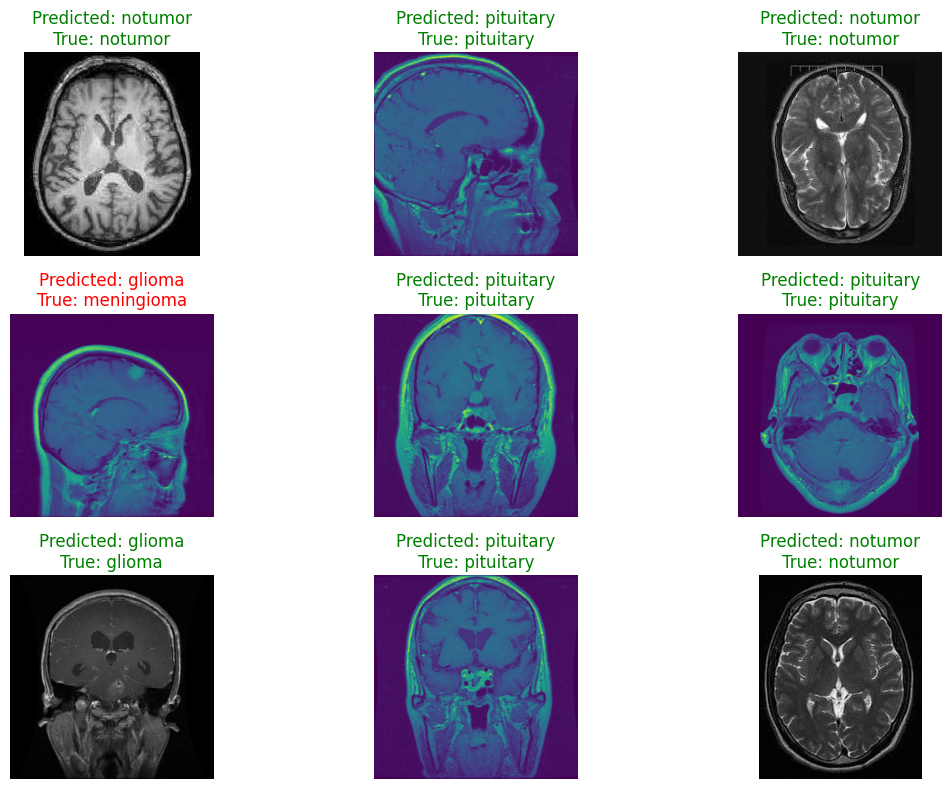

In [ ]:
# Calculate precision, recall, and F1-score from the confusion matrix
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1-score for each class
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()

# Analyze the sample images and their predictions
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
train_acc = max(history.history["accuracy"])
val_acc = max(history.history["val_accuracy"])

print(f"Best Training Accuracy: {train_acc*100:.2f}%")
print(f"Best Validation Accuracy: {val_acc*100:.2f}%")


Best Training Accuracy: 94.17%
Best Validation Accuracy: 92.68%


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.8457 - loss: 0.4242
Test Accuracy: 88.71%
Test Loss: 0.3192
